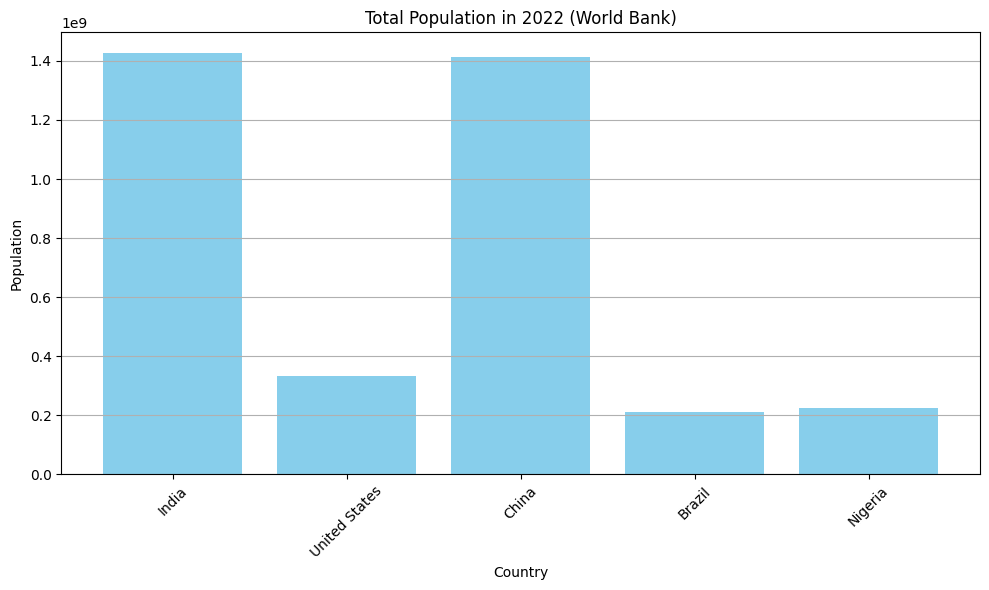

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests, zipfile, io

# Step 1: Download ZIP from World Bank
url = "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
response = requests.get(url)

# Step 2: Extract the ZIP contents
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    file_list = z.namelist()
    data_file = [f for f in file_list if f.startswith("API_") and f.endswith(".csv")][0]
    z.extract(data_file)

# Step 3: Load CSV into DataFrame
df = pd.read_csv(data_file, skiprows=4)

# Step 4: List of countries to compare
countries = ["India", "United States", "China", "Brazil", "Nigeria"]

# Step 5: Filter the latest population for each country
latest_year = "2022"  # You can change this to another recent year if needed

# Collect data for bar chart
population_data = []
for country in countries:
    df_country = df[df["Country Name"] == country]
    pop_value = pd.to_numeric(df_country[latest_year].values[0], errors='coerce')
    population_data.append((country, pop_value))

# Step 6: Create a bar chart
plt.figure(figsize=(10, 6))
countries_list = [item[0] for item in population_data]
pop_values = [item[1] for item in population_data]

plt.bar(countries_list, pop_values, color='skyblue')
plt.title(f"Total Population in {latest_year} (World Bank)")
plt.xlabel("Country")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

